Q1. Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees split the data step-by-step, choosing the best variable and cutoff that improves prediction the most at each step. This keeps going until the splits are small enough or the data can’t be improved further.
2. Trees are great at handling non-linear patterns because they split the data into chunks instead of forcing a straight line through it. Linear models can miss patterns unless you manually add curves or interactions. Trees just adapt to whatever shape the data takes.

3. Gini helps pick splits that make each group as clear as possible, meaning mostly one class in each split. It’s fast to compute and works well to guide the tree toward useful splits.

4. Trees overfit because they’ll keep splitting until they memorize the data, even the noise. You can stop that by limiting how deep the tree can go, setting a minimum number of samples per leaf, or pruning back extra splits.

5. False. Trees work well with both numeric and categorical data. They’re flexible and can split numbers and categories just fine.

6. Splitting into just two is simpler, easier to compute, and makes cleaner trees. More branches make the tree messier and can lead to overfitting quickly.

7. If a tree is super deep with tiny splits and perfect training results, it’s probably overfitting. If it’s too shallow and missing obvious patterns, it’s underfitting. Compare training and test scores to get a feel.





Q2. This is a case study on regression and classification trees.

1. Load ./data/cars_hw.csv. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables Make, Color, Body_type, No_of_Owners, Fuel_Type, Transmission, and Transmission_Type, create dummy/one-hot-encoded representations. For numeric variables, we'll use Mileage_Run, Make_Year, and Seating_Capacity. Our target variable will be Price. Make a train-test split of your data.

3. From sklearn.tree, import the DecisionTreeRegressor and plot_tree. Use a train-test split to iterate over possible values for min_samples_leaf, computing the R^2 for each value between 1 and 25. What choice achieves the highest on the test data?

4. For the optimal min_samples_leaf from 3, regress price on the rest of the features/covariates using the training data. What is your R^2 and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?
5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?
6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [2]:
import pandas as pd
df = pd.read_csv("cars_hw.csv")
print("Shape of data:", df.shape)
print("Available variables:", df.columns.tolist())
print(df.head())


Shape of data: (976, 12)
Available variables: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol   

In [6]:
from sklearn.model_selection import train_test_split

#Ccategorical and numeric
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

df_encoded = pd.get_dummies(df[categorical_vars + numeric_vars + [target_var]], drop_first=True)

X = df_encoded.drop(columns=target_var)
y = df_encoded[target_var]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


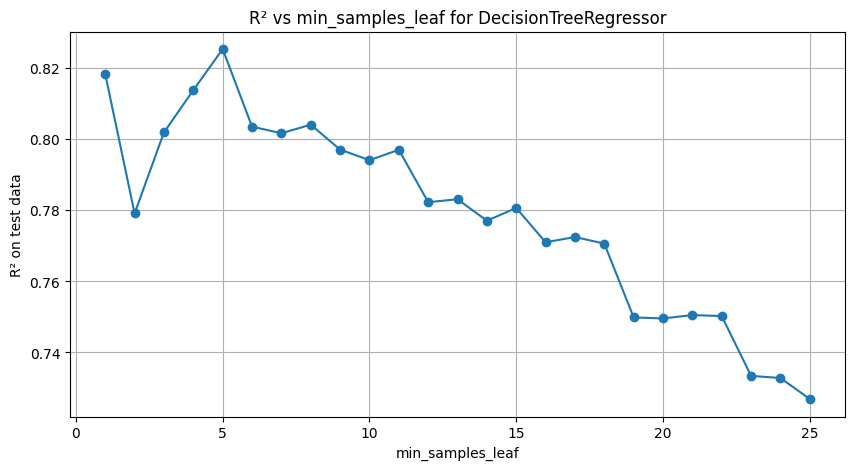

Optimal min_samples_leaf: 5


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

r2_scores = []
min_leaf_vals = range(1, 26)

for val in min_leaf_vals:
    model = DecisionTreeRegressor(min_samples_leaf=val, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

# R² vs min_samples_leaf
plt.plot(min_leaf_vals, r2_scores, marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('R² on test data')
plt.title('R² vs min_samples_leaf for DecisionTreeRegressor')
plt.grid(True)
plt.show()

#  best min_samples_leaf
best_leaf = min_leaf_vals[r2_scores.index(max(r2_scores))]
print(f"Optimal min_samples_leaf: {best_leaf}")


Decision Tree - R²: 0.8253, RMSE: 141536.54


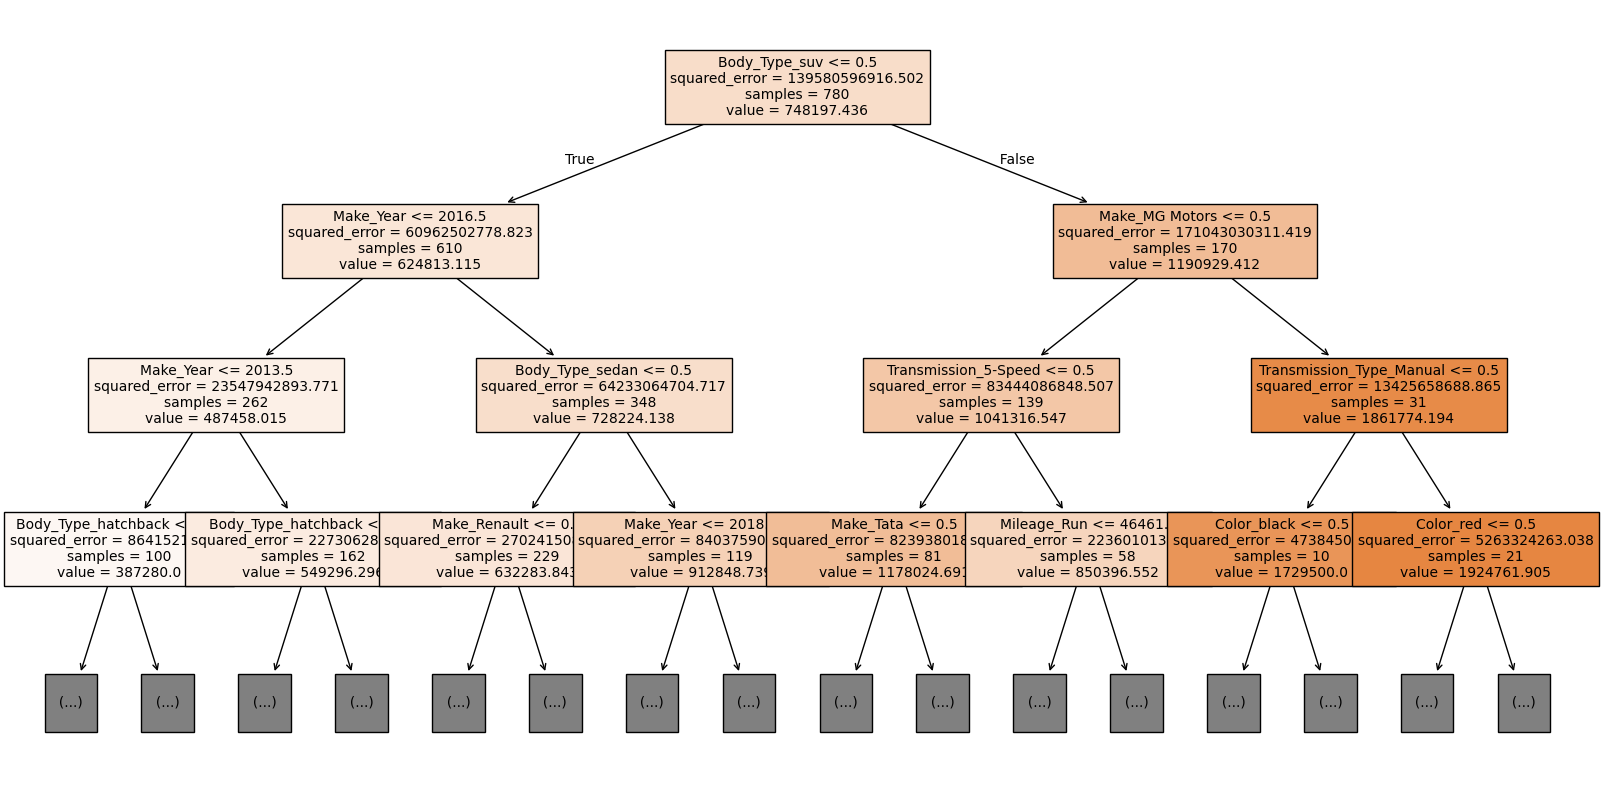

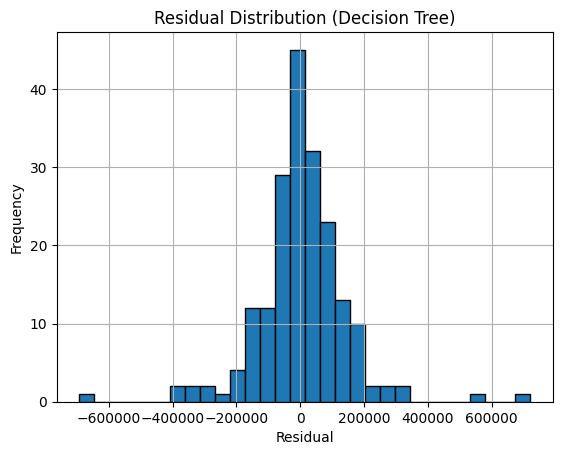

Residual mean: 5605.53, Std: 141787.66


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import numpy as np

# Fit model
best_tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_tree.fit(X_train, y_train)

# Predictions & metrics
y_pred_tree = best_tree.predict(X_test)
r2_tree = r2_score(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))

print(f"Decision Tree - R²: {r2_tree:.4f}, RMSE: {rmse_tree:.2f}")


plot_tree(best_tree, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.show()

residuals = y_test - y_pred_tree
plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Residual Distribution (Decision Tree)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# checking residual symmetry
print(f"Residual mean: {residuals.mean():.2f}, Std: {residuals.std():.2f}")


In [9]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)


r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Linear Regression - R²: {r2_lin:.4f}, RMSE: {rmse_lin:.2f}")


Linear Regression - R²: 0.8203, RMSE: 143575.20


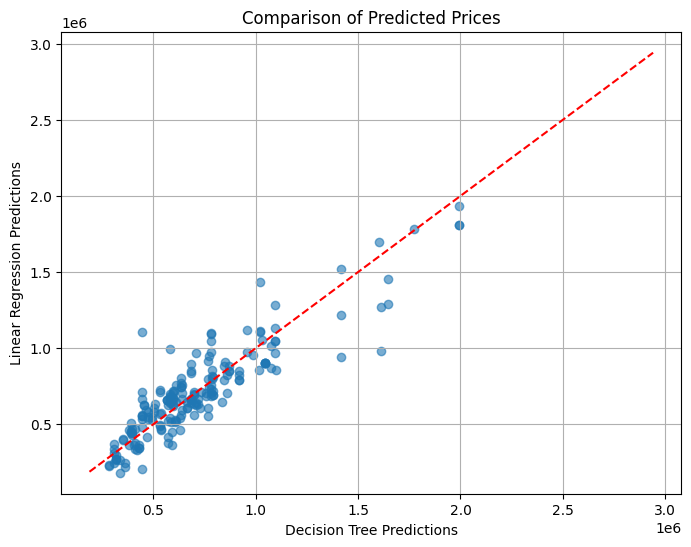

In [10]:
#scatterplot of predictions from trees vs linear model
plt.scatter(y_pred_tree, y_pred_lin, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Decision Tree Predictions")
plt.ylabel("Linear Regression Predictions")
plt.title("Comparison of Predicted Prices")
plt.grid(True)
plt.show()


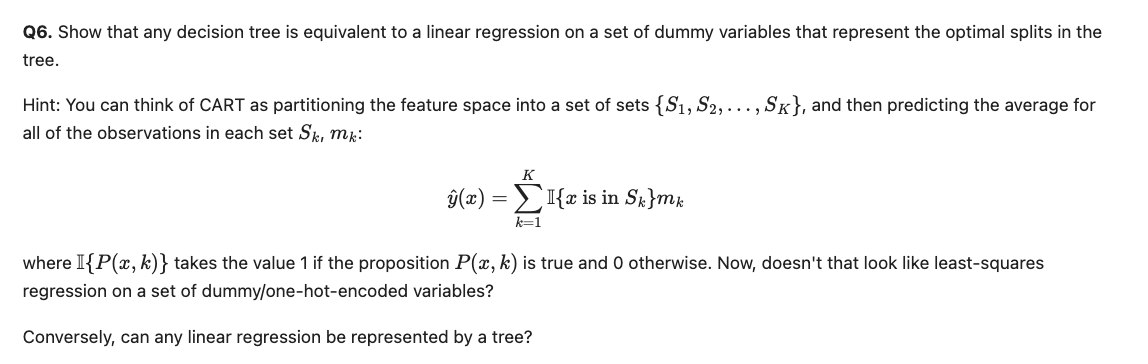

The equation shown above can be equivalent to regressing on a set of dummy variables. The dummy variabe can is defined below- and dummy variables are mutually exclusive and sum to 1 as each x s in exactly one region.
Then the regression model is also shown below. The model is linear on dummy variables Dk, as the coefficients mk are fitted through least squares. Therefore, a decision tree can be expressed as a linear regrssion, where the encoding is determined by the regions defined by the tree.
However, not every linear regression can be represented by a tree. Moreover, a linear regression can model continuous relationships between features and outputs (what it computes is written below). A decision tree creates piecewise constant functions-and the output is constant within each region. Therefore, a deicision tree can't model continous or smooth relationship unless it one, has infinitely many splits (which is impractical), and two, unless it uses tree ensembles. Overall, a decision tree is comparable to linear regression, but, not all linear regression models can be represented by decision trees as trees do not have the ability to model linear interactions across continous space unless it is very deep

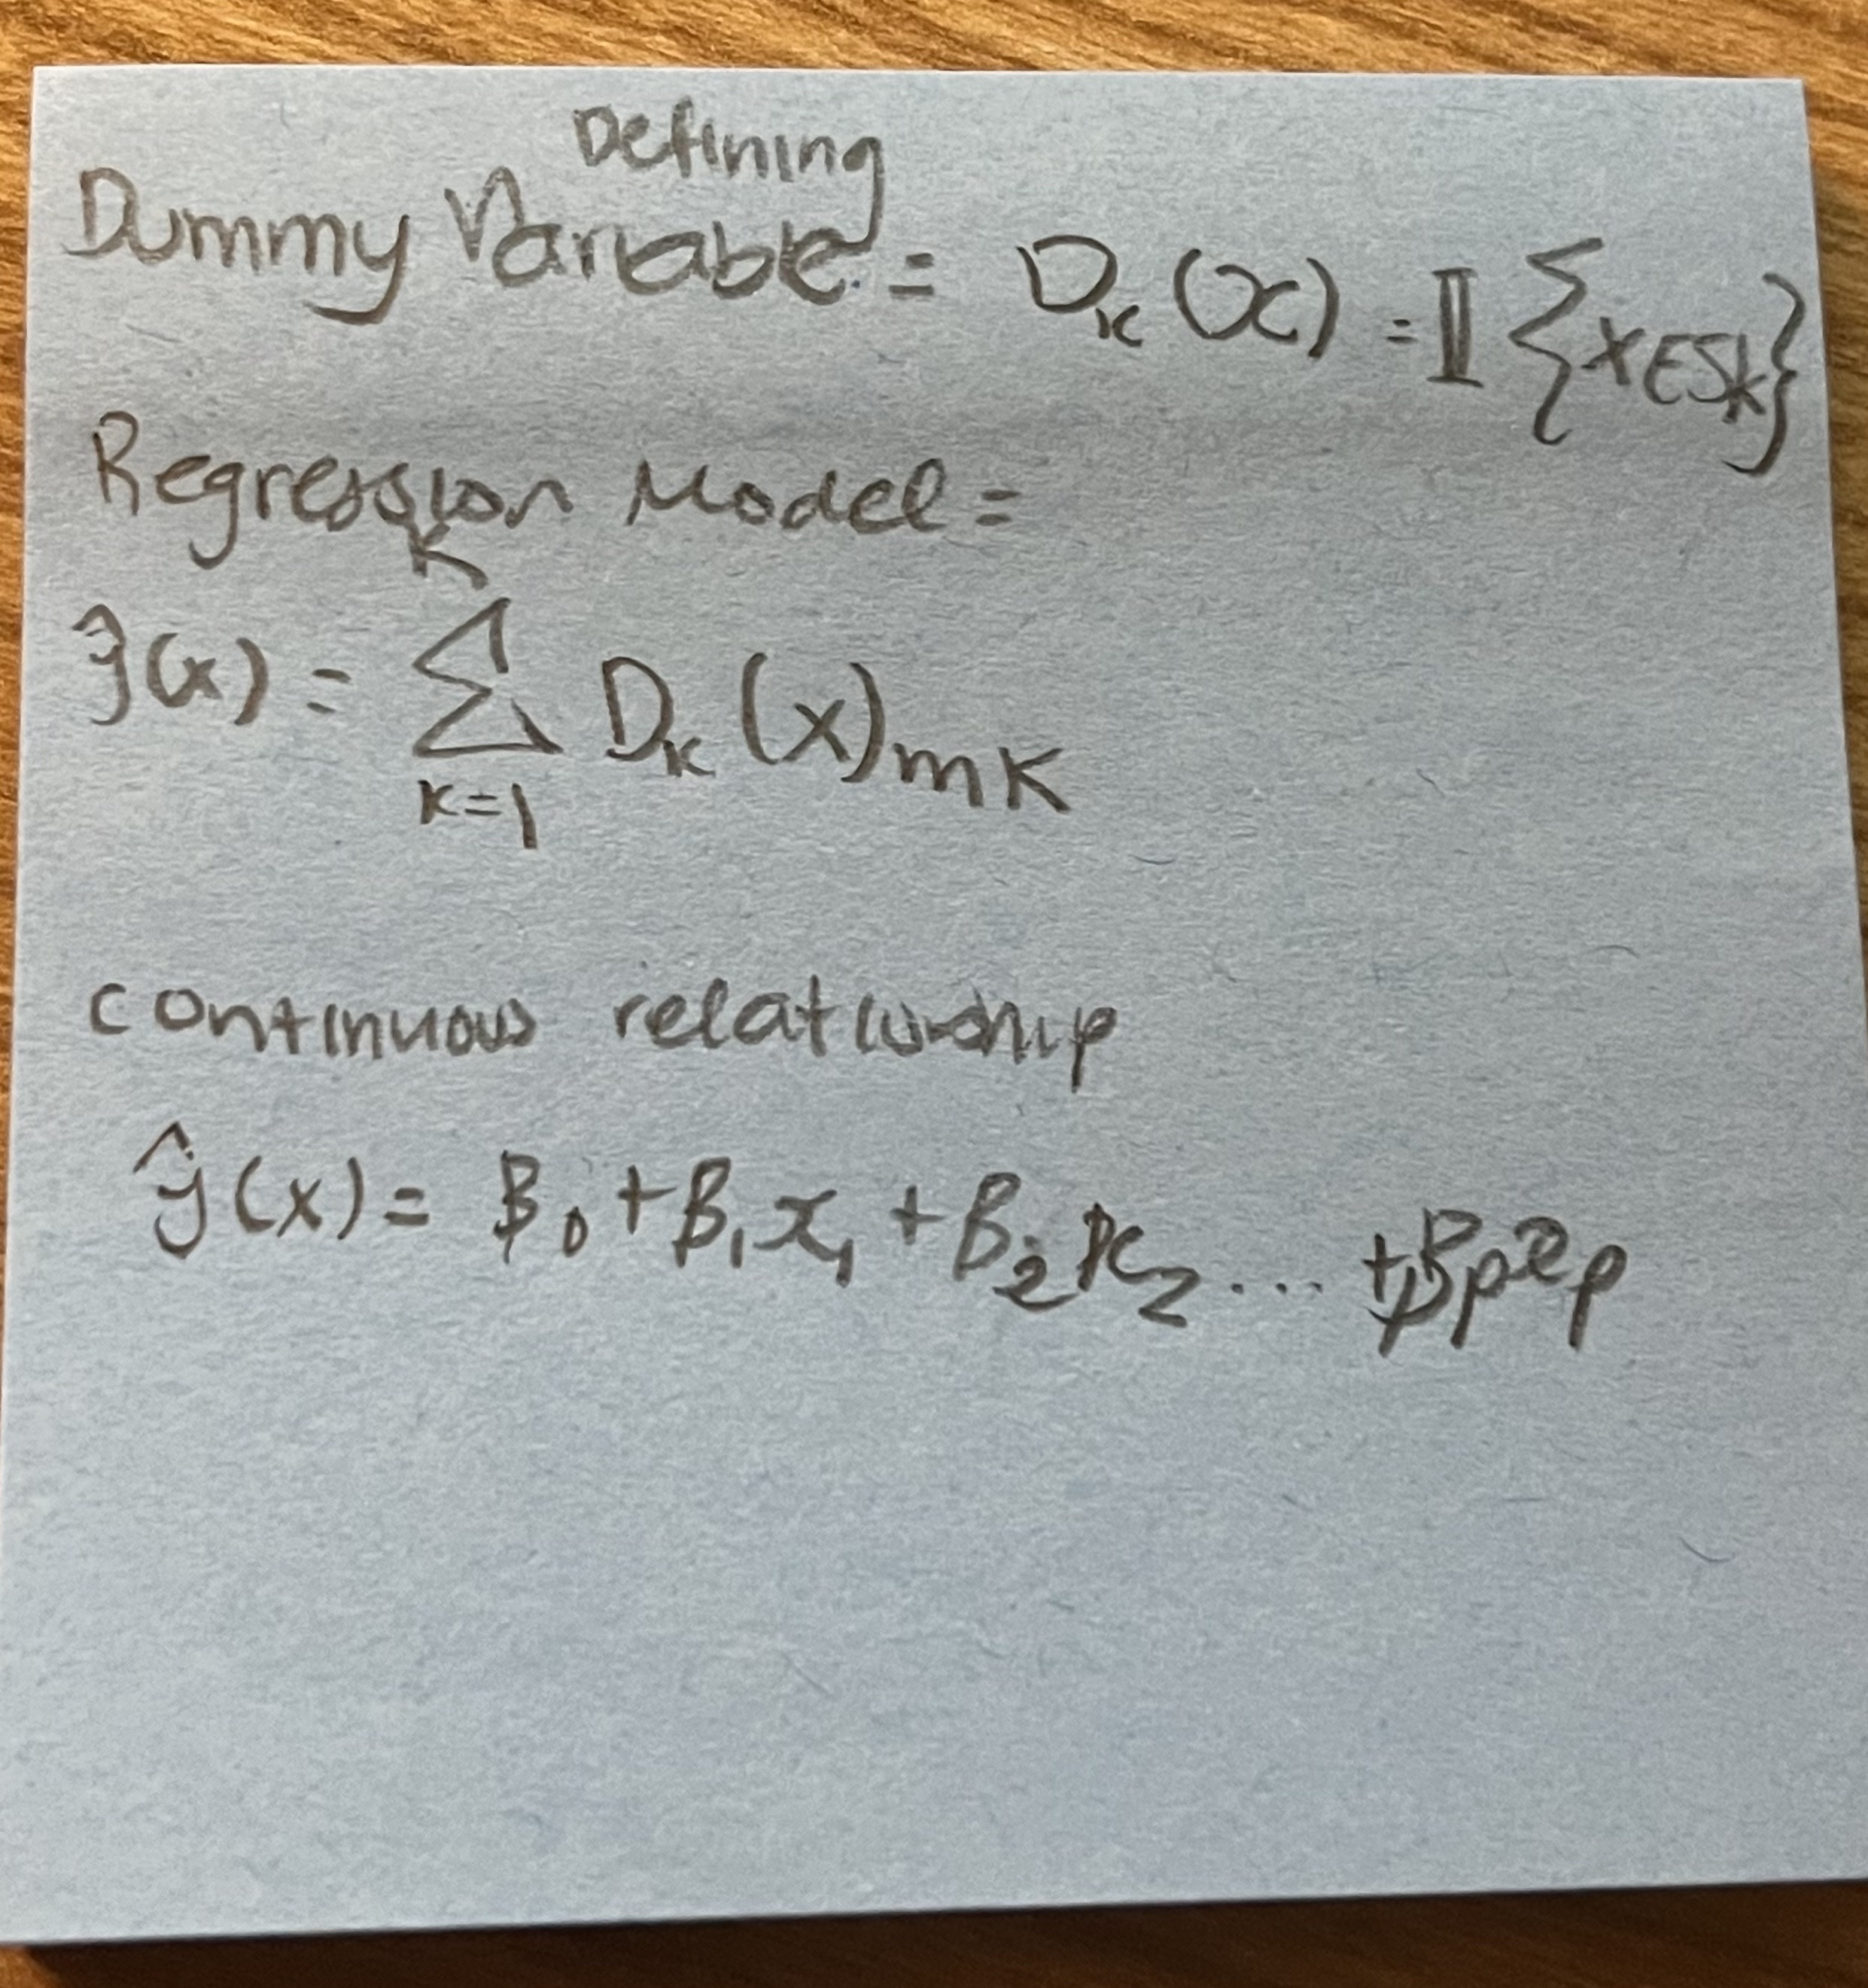